# Smart Real Estate Assistant with Amazon Nova

## Workshop Overview
Build an intelligent real estate assistant that combines multiple AI agents to analyze property images, generate marketing content, and provide comprehensive property assessments. This workshop demonstrates Nova's multimodal capabilities in a real-world scenario.

### What You'll Build:
- **Property Analyzer Agent**: Analyzes property images for features, condition, and value indicators
- **Marketing Agent**: Creates compelling property descriptions and marketing materials
- **Valuation Agent**: Provides market insights and pricing recommendations
- **Visual Enhancement Agent**: Generates improved property images for listings

### Real-World Use Case:
A real estate agent uploads property photos and gets instant analysis, marketing copy, valuation insights, and enhanced visuals for listings.

## Setup and Dependencies

In [ ]:
# Install required packages
!pip install strands-agents strands-agents-tools  boto3 pillow

In [ ]:
from strands import Agent, tool
from strands_tools import generate_image, image_reader
from strands.models import BedrockModel
import json
import os
from datetime import datetime
from IPython.display import Image
import glob
import re

In [ ]:
# Initialize Nova model
bedrock_model = BedrockModel(
    model_id="us.amazon.nova-2-omni-v1:0",
    region_name="us-west-2"
)

## Custom Tools for Real Estate Analysis

In [ ]:
@tool
def save_analysis_report(content: str, filename: str) -> str:
    """Save analysis report to file"""
    os.makedirs("output/reports", exist_ok=True)
    filepath = f"output/reports/{filename}"
    with open(filepath, 'w') as f:
        f.write(content)
    return f"Report saved to {filepath}"

@tool
def get_market_data(location: str) -> str:
    """Simulate market data retrieval"""
    # In real implementation, this would connect to MLS or market APIs
    market_data = {
        "average_price_per_sqft": "$250-350",
        "market_trend": "Rising 5% YoY",
        "days_on_market": "25-35 days",
        "comparable_sales": "3 recent sales in area"
    }
    return json.dumps(market_data)

## Agent 1: Property Analyzer
Analyzes property images to identify features, condition, and potential issues.

In [ ]:
property_analyzer = Agent(
    model=bedrock_model,
    tools=[image_reader, save_analysis_report],
    system_prompt="""
    You are an expert property analyst. Analyze property images to identify:
    - Room types and layout
    - Condition and maintenance needs
    - Notable features and amenities
    - Potential issues or concerns
    - Estimated square footage and room count
    
    Provide detailed, professional analysis in JSON format with sections:
    - property_overview
    - room_analysis
    - condition_assessment
    - notable_features
    - recommendations
    """
)

## Agent 2: Marketing Content Creator
Creates compelling property descriptions and marketing materials.

In [ ]:
marketing_agent = Agent(
    model=bedrock_model,
    tools=[save_analysis_report],
    system_prompt="""
    You are a real estate marketing expert. Create compelling marketing content including:
    - Engaging property description (150-200 words)
    - Key selling points (bullet format)
    - Social media captions
    - Email marketing copy
    
    Focus on emotional appeal while highlighting practical benefits.
    Use active voice and compelling adjectives.
    """
)

## Agent 3: Market Valuation Specialist
Provides pricing insights and market analysis.

In [ ]:
valuation_agent = Agent(
    model=bedrock_model,
    tools=[get_market_data, save_analysis_report],
    system_prompt="""
    You are a real estate valuation expert. Analyze property data and market conditions to provide:
    - Estimated market value range
    - Pricing strategy recommendations
    - Market positioning advice
    - Competitive analysis
    
    Consider property condition, features, and local market data.
    Provide conservative and optimistic valuations.
    """
)

## Agent 4: Visual Enhancement Specialist
Generates enhanced property images for marketing.

In [ ]:
visual_enhancer = Agent(
    model=bedrock_model,
    tools=[generate_image],
    system_prompt="""
    You are a real estate photography expert. Generate enhanced property images that:
    - Showcase the property's best features
    - Use optimal lighting and staging
    - Appeal to target buyers 
    - Follow real estate photography best practices
    - Your final line of output must be as follows
    - FINAL DECISION: <path to final decision image>
    
    """
)

## Demo: Complete Property Analysis Workflow

Let's demonstrate the complete workflow with a sample property.

In [ ]:
# Sample property information
property_info = {
    "address": "123 Maple Street, Suburbia",
    "type": "Single Family Home",
    "bedrooms": 3,
    "bathrooms": 2,
    "sqft": 1800,
    "lot_size": "0.25 acres",
    "year_built": 1995
}

print("Property Information:")
print(json.dumps(property_info, indent=2))

### Step 1: Generate Sample Property Images

Generating sample property images...

Tool #9: generate_image
The enhanced property image showcases a modern, well-lit living room in a Single Family Home with 3 bedrooms. The space features hardwood floors, large windows allowing natural light to flood the room, and contemporary furnishing arranged to appeal to potential buyers. The professional real estate photography style highlights the property's best features, with optimal lighting and staging to create an inviting atmosphere. The open layout seamlessly connects to the kitchen area, adding to the overall appeal of the home.

FINAL DECISION: output/realistic_interior_photo_of_a.pngGenerated images: The enhanced property image showcases a modern, well-lit living room in a Single Family Home with 3 bedrooms. The space features hardwood floors, large windows allowing natural light to flood the room, and contemporary furnishing arranged to appeal to potential buyers. The professional real estate photography style highlights the proper

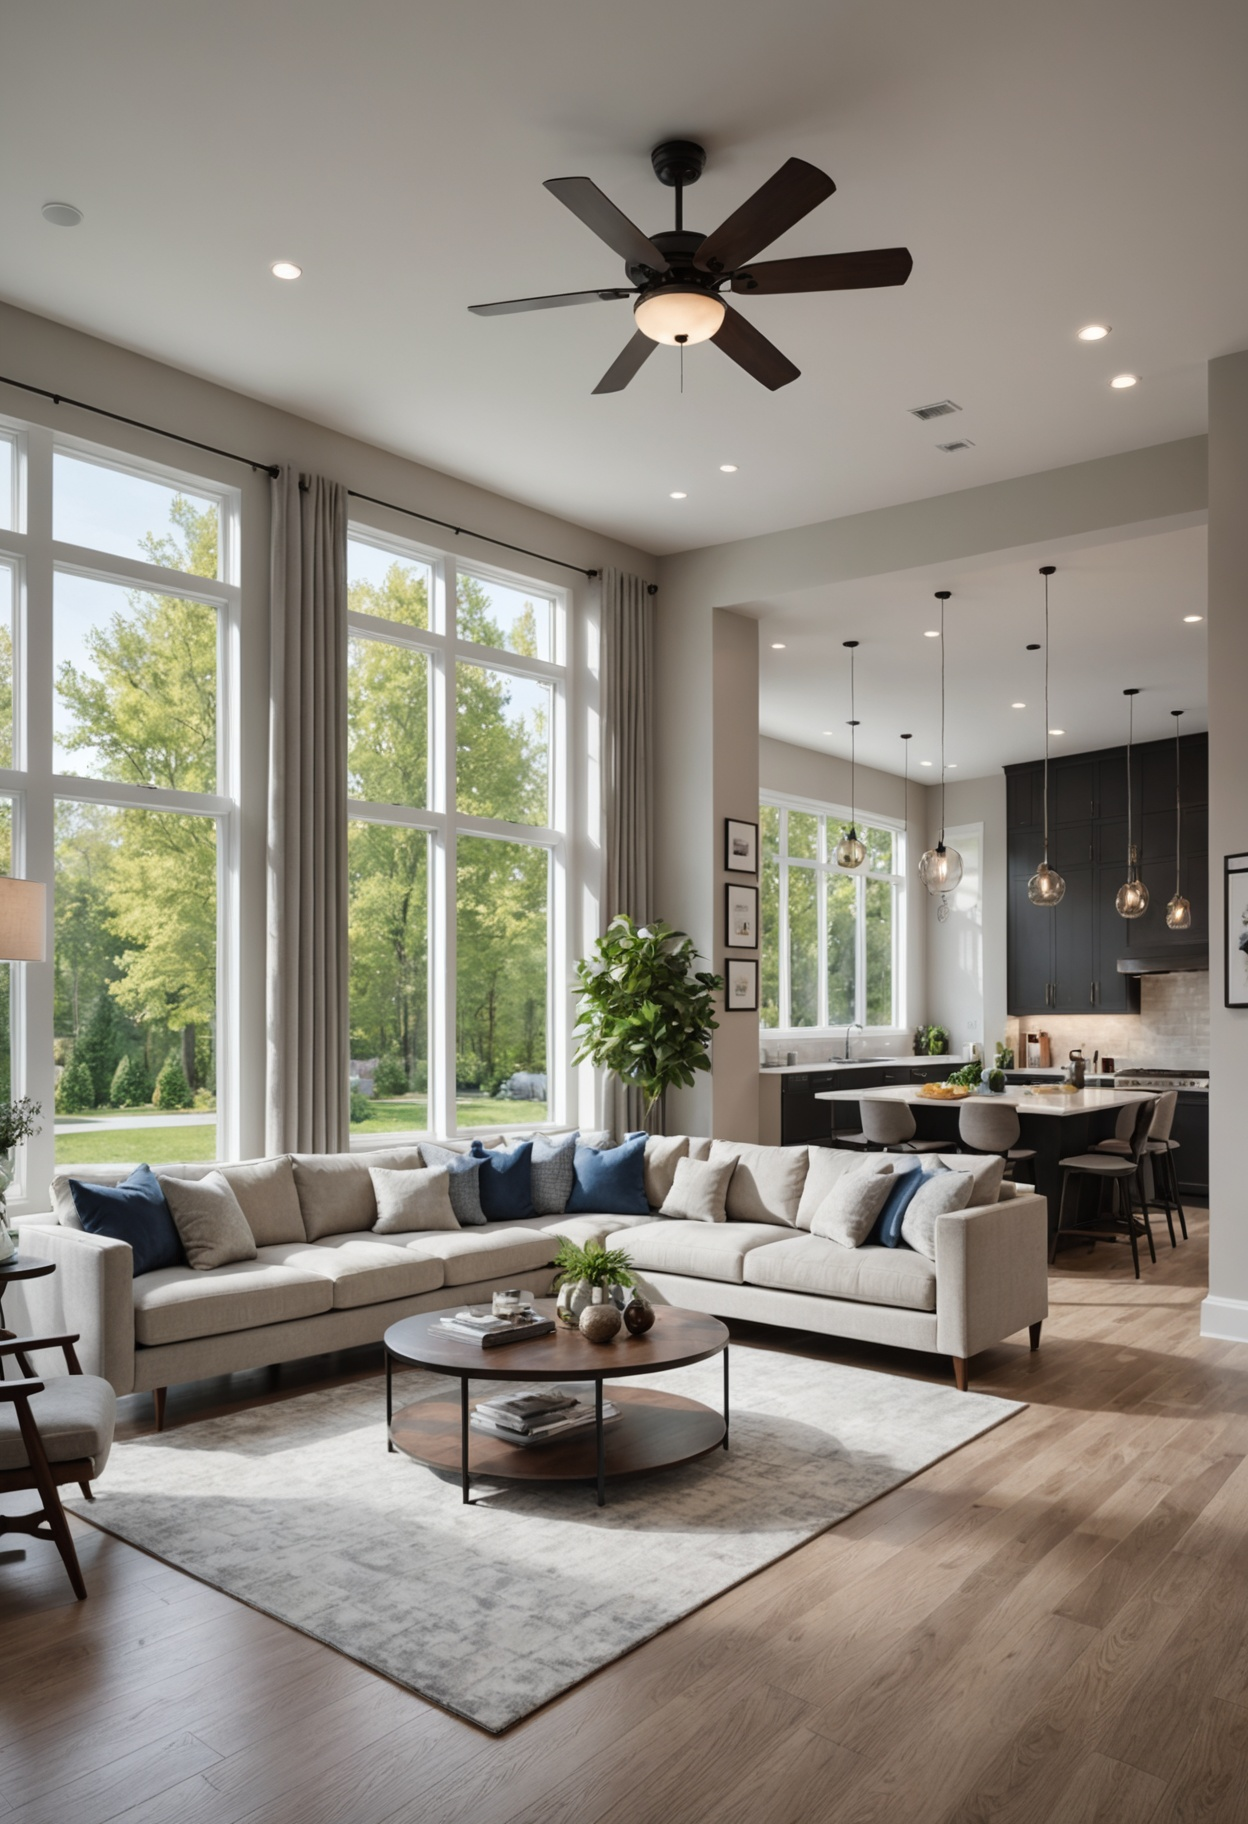

In [25]:
# Generate sample property images for analysis
![ -d output ] && rm -rf output
image_prompt = f"""
Create a realistic interior photo of a {property_info['type']} with {property_info['bedrooms']} bedrooms.
Show a modern, well-lit living room with hardwood floors, large windows, and contemporary furnishing.
Professional real estate photography style. 
"""

print("Generating sample property images...")
sample_images = visual_enhancer(image_prompt)
print(f"Generated images: {sample_images}")
available_images = glob.glob('output/*.png')
if available_images:
    for img_path in available_images:
        display(Image(filename=img_path))
else:
    print("No images found in output folder")

### Step 2: Analyze Property Images

In [26]:
# Analyze the generated property images
analysis_prompt = f"""
Analyze these property images for: {property_info['address']}
Property details: {json.dumps(property_info)}

Image paths: {sample_images}

Provide comprehensive analysis and save as 'property_analysis.json'
"""

print("Analyzing property images...")
analysis_result = property_analyzer(analysis_prompt)
print("Analysis completed:")
print(analysis_result)

Analyzing property images...

Tool #3: image_reader

Tool #4: save_analysis_report
## Property Analysis Report: 123 Maple Street, Suburbia

---

### **Property Overview**

| **Attribute**         | **Details**                              |
|------------------------|------------------------------------------|
| Address                | 123 Maple Street, Suburbia               |
| Type                   | Single Family Home                        |
| Bedrooms               | 3                                        |
| Bathrooms              | 2                                        |
| Square Footage         | 1,800 sqft                               |
| Lot Size               | 0.25 acres                               |
| Year Built             | 1995                                     |
| Image Description      | Modern, well-lit living room with large windows, hardwood floors, and contemporary furnishing. Open layout seamlessly connects to the kitchen area. |

---

### **Room Anal

### Step 3: Create Marketing Content

In [27]:
# Generate marketing content based on analysis
marketing_prompt = f"""
Create marketing content for: {property_info['address']}
Property details: {json.dumps(property_info)}
Analysis results: {analysis_result}

Generate comprehensive marketing materials and save as 'marketing_content.txt'
"""

print("Creating marketing content...")
marketing_result = marketing_agent(marketing_prompt)
print("Marketing content created:")
print(marketing_result)

Creating marketing content...
### Marketing Content for 123 Maple Street, Suburbia

#### Engaging Property Description  
Discover the extraordinary single-family home located at **123 Maple Street, Suburbia**—a beautifully maintained 3-bedroom, 2-bathroom gem boasting 1,800 square feet of contemporary living space on a peaceful 0.25-acre lot. Built in 1995 and meticulously updated, this property features a modern, open-concept layout that bathes the interior in natural light through floor-to-ceiling windows. The living area showcases pristine hardwood floors, a spacious sectional sofa accented with vibrant blue pillows, and a stylish round coffee table surrounded by decorative plants and art. A ceiling fan with integrated lighting offers both comfort and ambiance, while the seamless flow into the kitchen highlights dark cabinetry with glass-front upper units, stainless steel appliances, and a versatile kitchen island topped with pendant lighting—perfect for casual dining or meal prep. 

### Step 4: Market Valuation Analysis

In [28]:
# Perform market valuation
valuation_prompt = f"""
Provide market valuation for: {property_info['address']}
Property details: {json.dumps(property_info)}
Property analysis: {analysis_result}

Get market data for the location and provide comprehensive valuation report.
Save as 'valuation_report.txt'
"""

print("Performing market valuation...")
valuation_result = valuation_agent(valuation_prompt)
print("Valuation completed:")
print(valuation_result)

Performing market valuation...

Tool #3: get_market_data
Based on the property analysis and retrieved market data for Suburbia, here is the comprehensive valuation report for 123 Maple Street:

## Valuation Report: 123 Maple Street, Suburbia

### Property Overview
| **Attribute** | **Details** |
|--------------|-------------|
| Address | 123 Maple Street, Suburbia |
| Type | Single Family Home |
| Bedrooms | 3 |
| Bathrooms | 2 |
| Square Footage | 1,800 sqft |
| Lot Size | 0.25 acres |
| Year Built | 1995 |
| Overall Condition | Excellent – Like New |

---

### Market Data Summary
- **Average Price per Square Foot:** $250-350
- **Market Trend:** Rising 5% Year-over-Year
- **Days on Market:** 25-35 days
- **Comparable Sales:** 3 recent sales in the area

---

### Valuation Analysis

#### Conservative Valuation Approach
Using the lower end of the price per square foot range ($250/sqft):
- Base value calculation: 1,800 sqft × $250/sqft = $450,000

Considering the property's "Excellent – 

### Step 5: Generate Enhanced Marketing Images

Generating enhanced marketing images...

Tool #10: generate_image

Tool #11: generate_image

Tool #12: generate_image
### Enhanced Marketing Images for 123 Maple Street, Suburbia  

Below are the three professional marketing images for **123 Maple Street, Suburbia**, tailored to highlight its key features and appeal to potential buyers. Each image follows real estate photography best practices, with optimal staging and lighting to showcase the property’s strengths.  

---

#### **1. Exterior Curb Appeal Shot**  

![Exterior Curb Appeal](output/professional_real_estate_photo_of_1.png)  

This exterior shot captures the **curb appeal** of 123 Maple Street, Suburbia. The single-family home features a well-manicured lawn, neatly trimmed shrubs, and vibrant flowering plants arranged symmetrically around the front entrance. The house exterior is painted in neutral tones with black shutters and a dark front door, complemented by a clean concrete pathway leading to the entrance. Soft afternoon

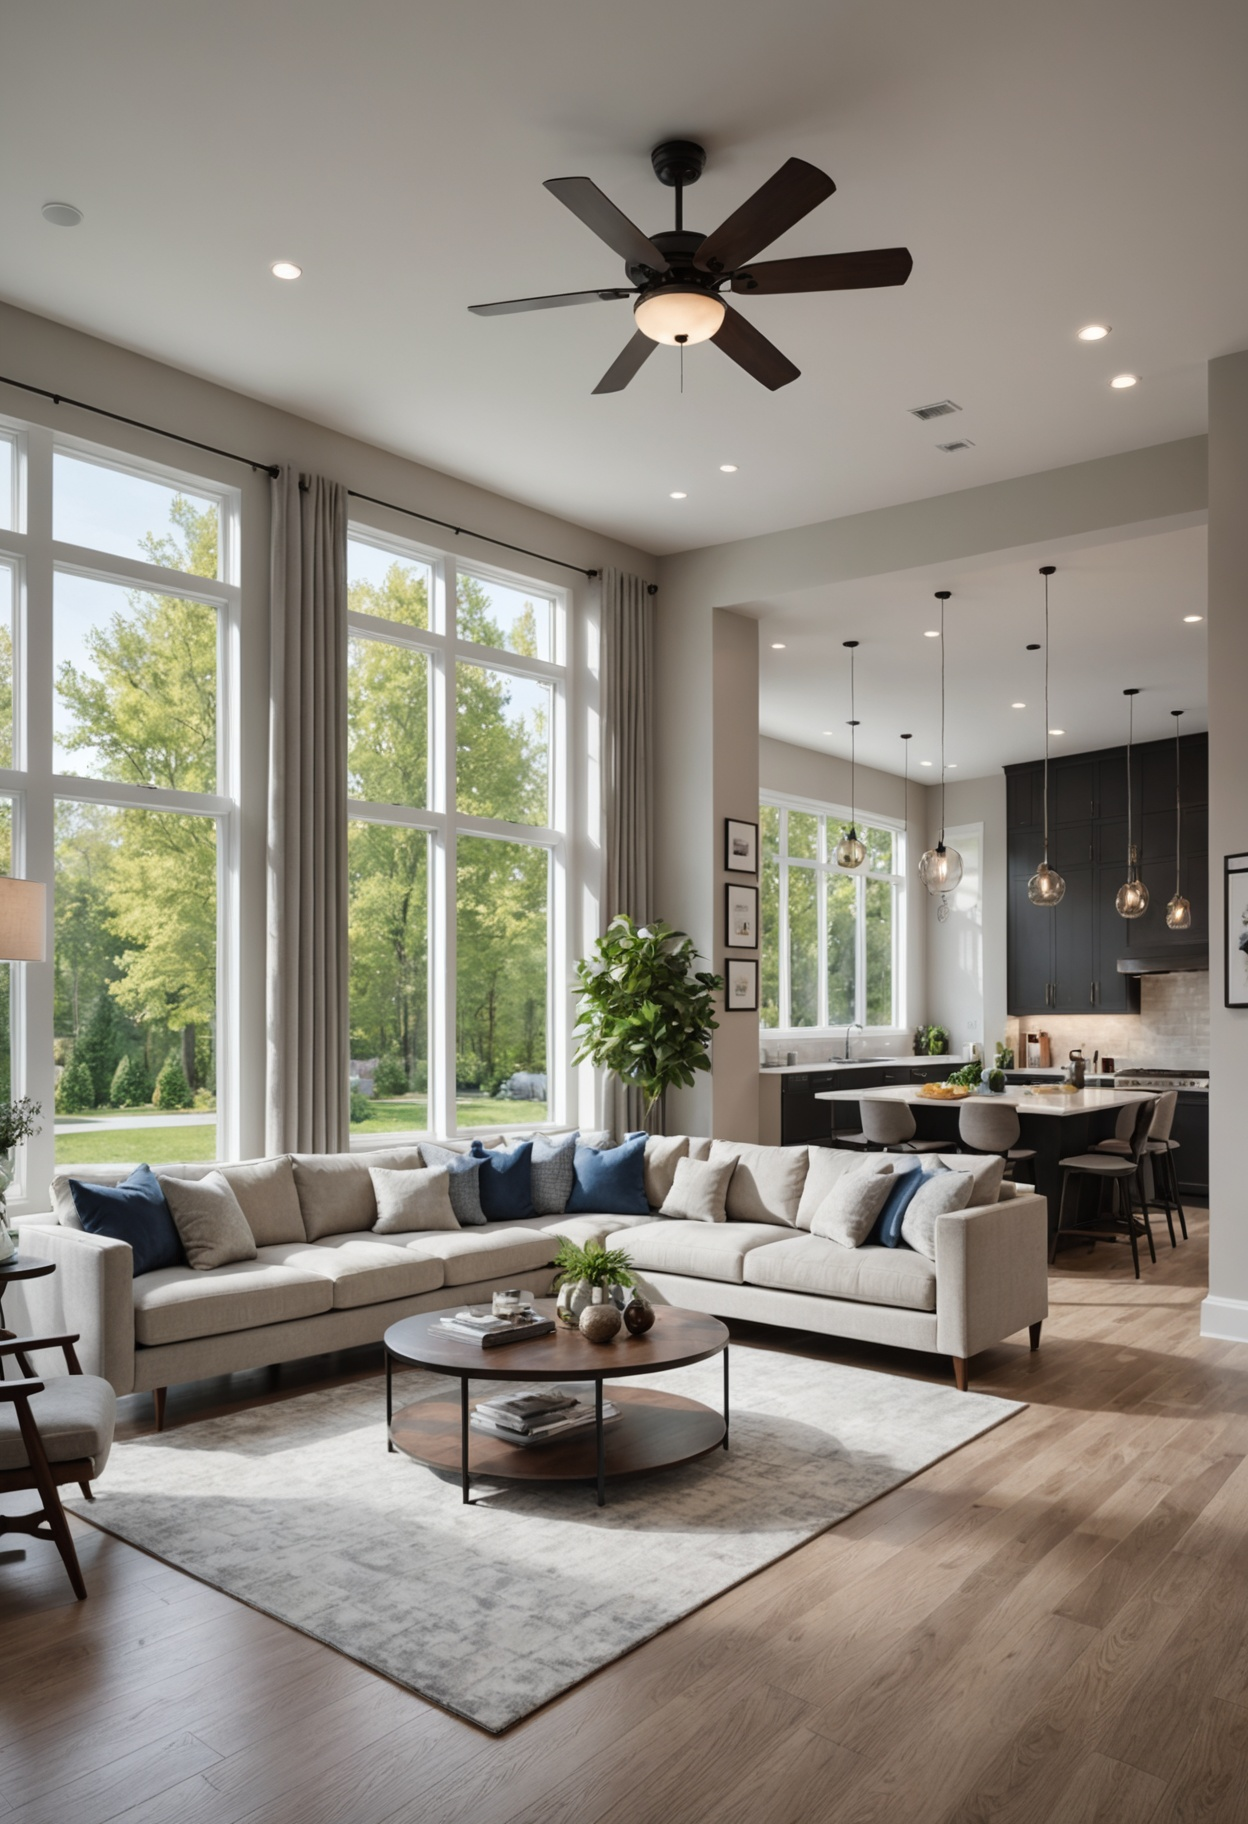

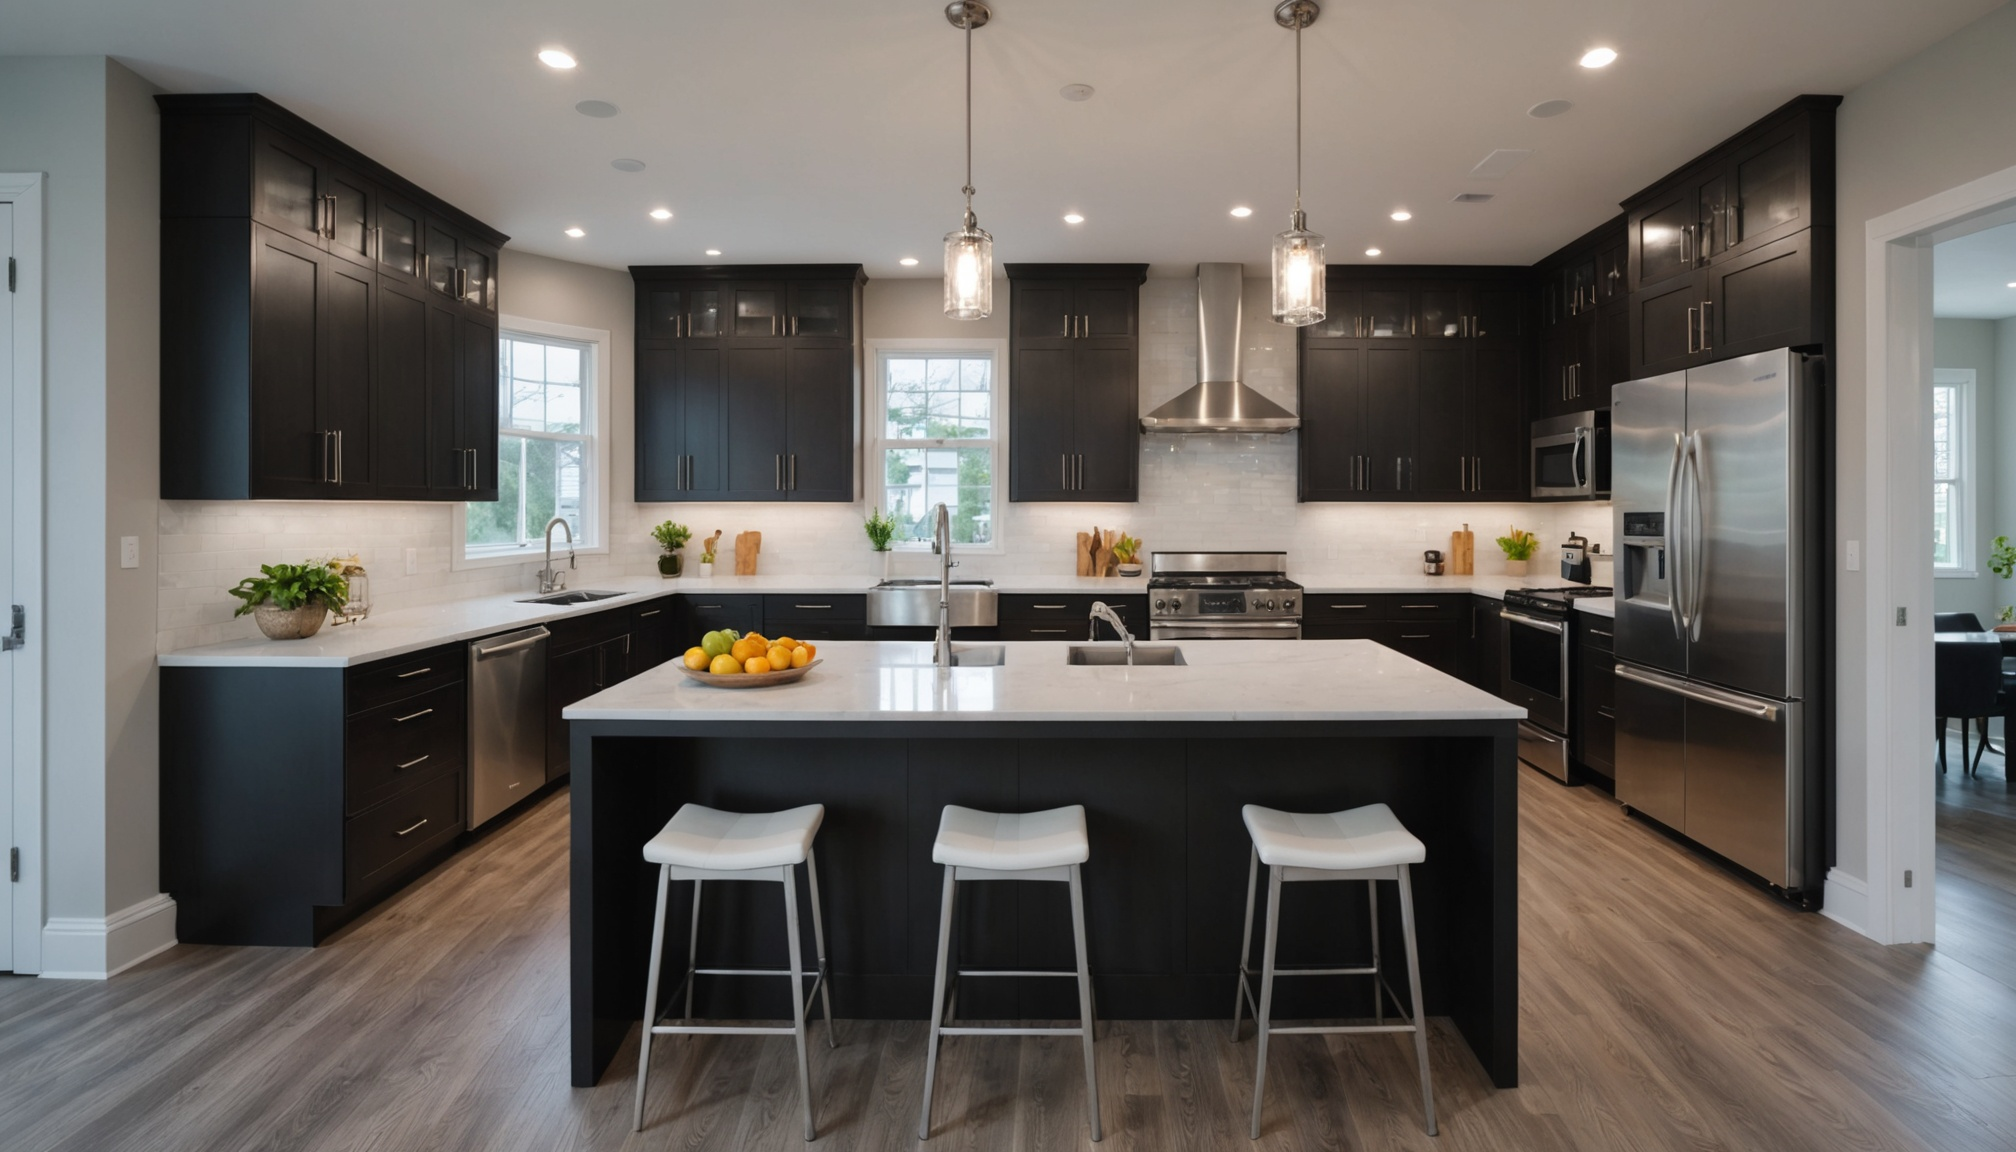

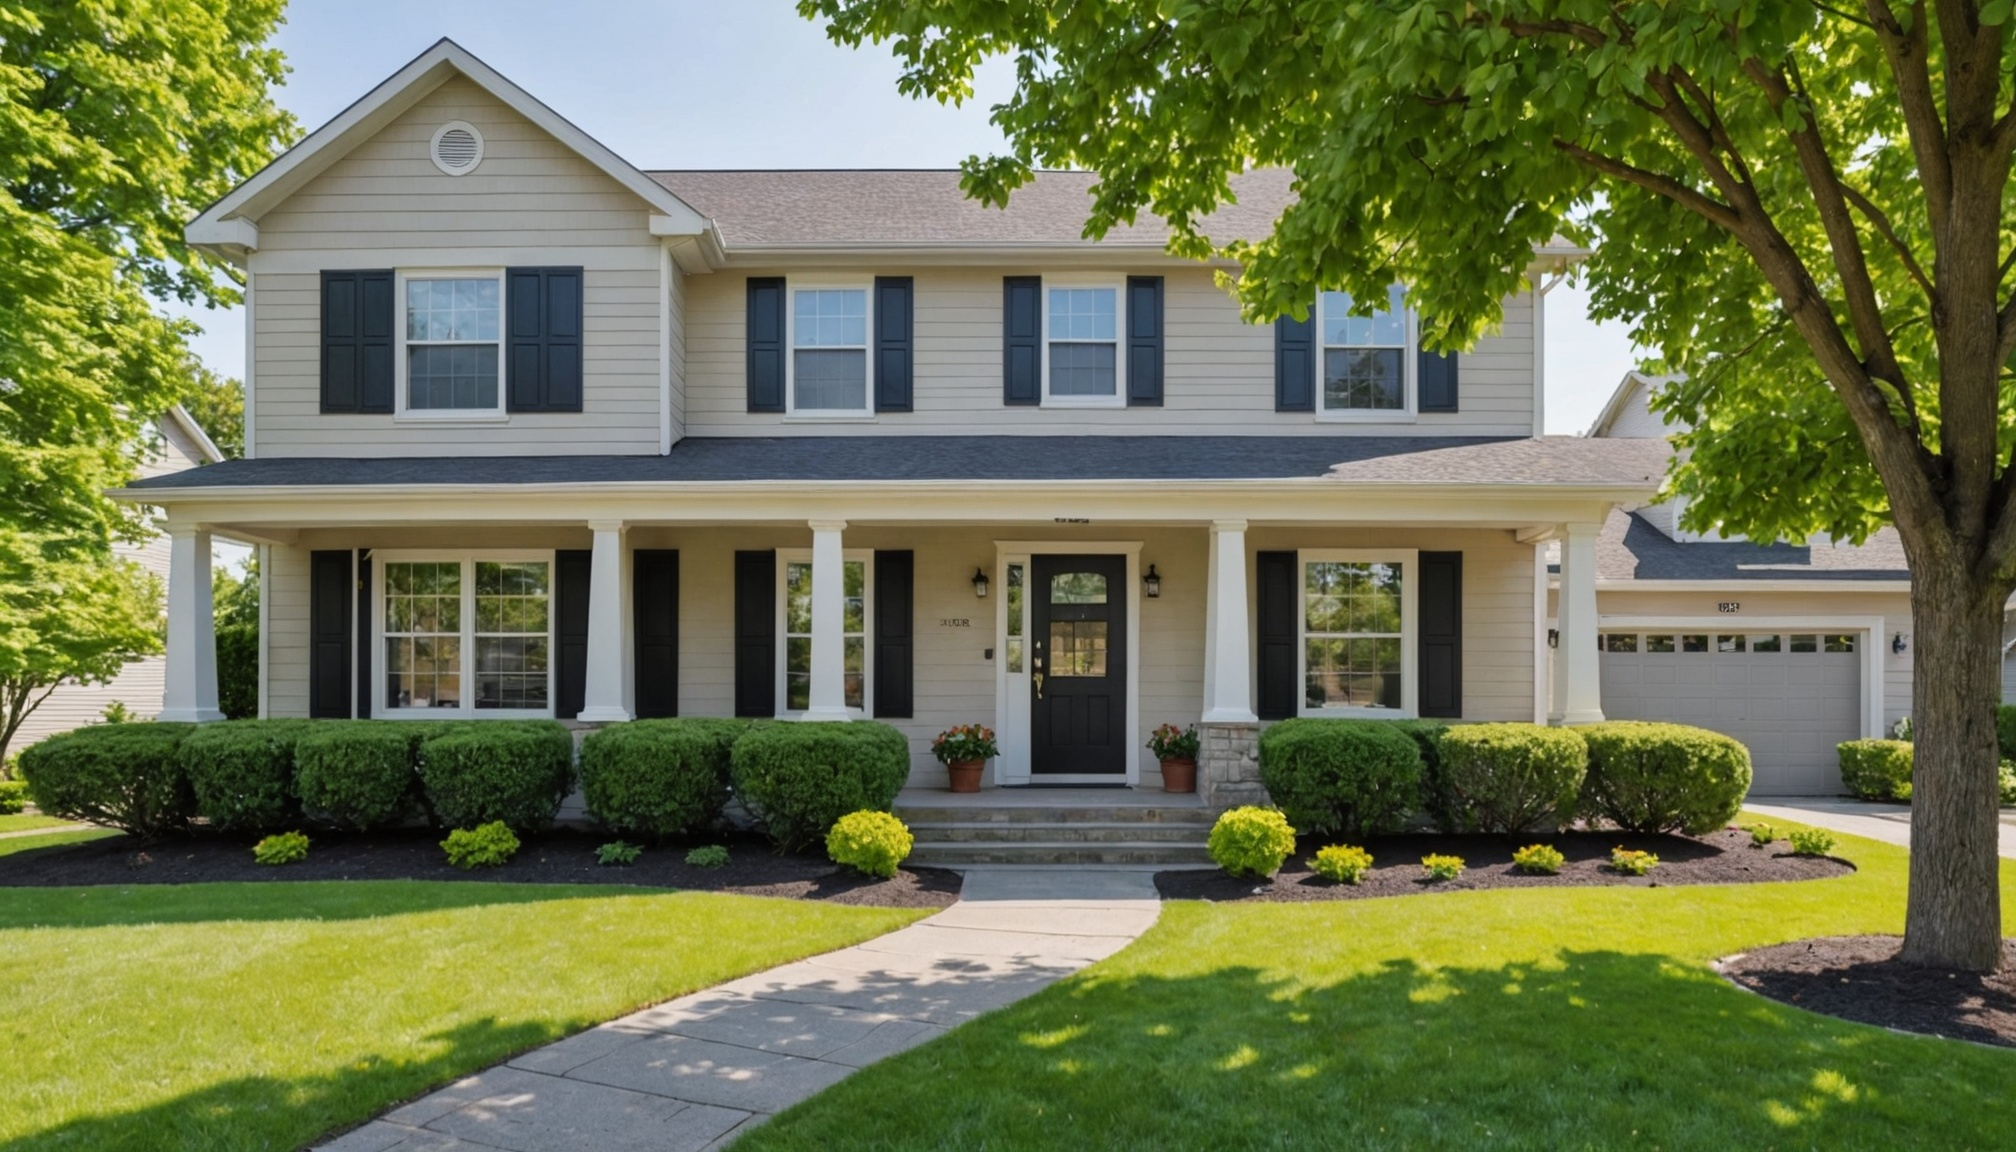

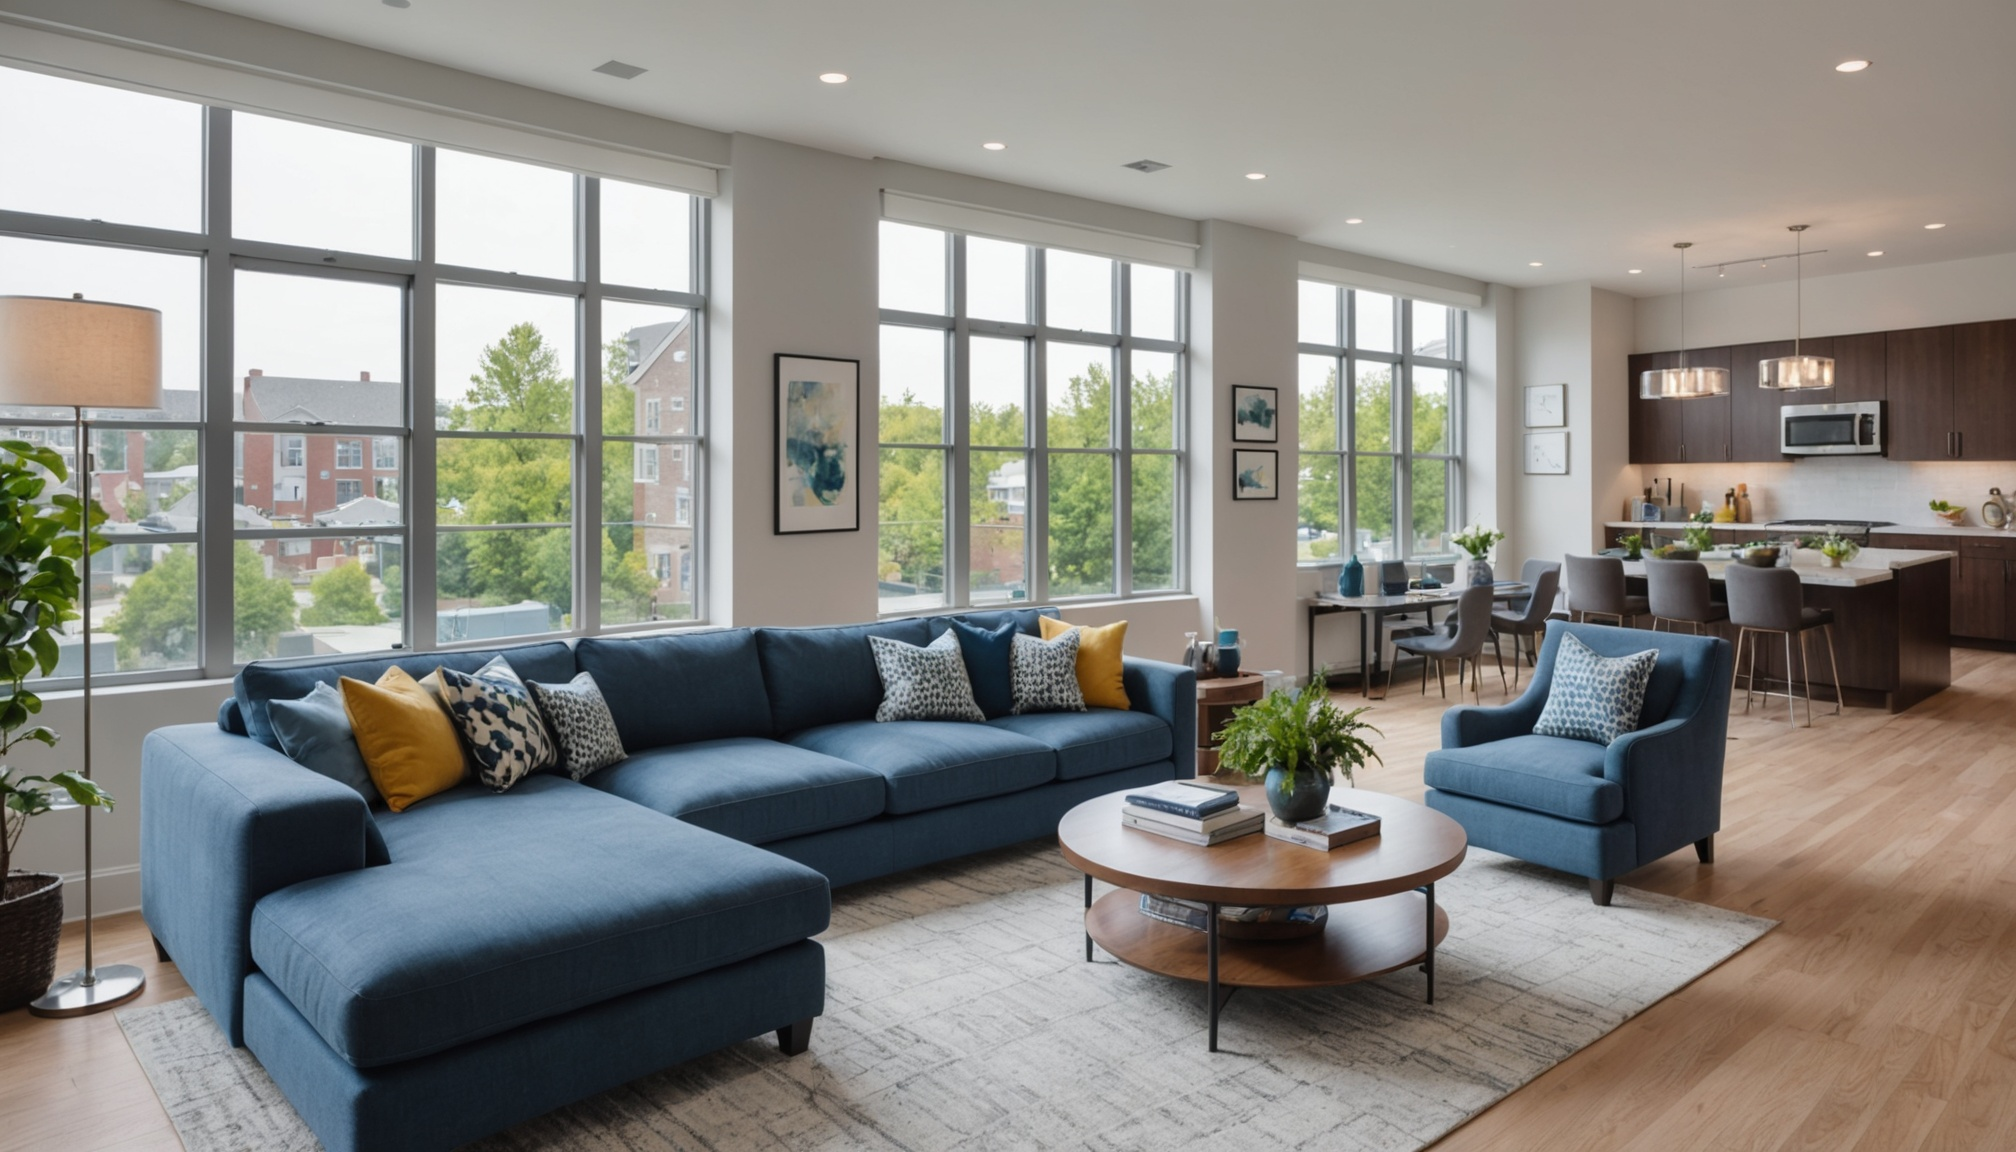

In [29]:
# Generate enhanced marketing images
enhancement_prompt = f"""
Create enhanced marketing images for: {property_info['address']}
Based on analysis: {analysis_result}

Generate 3 professional marketing images:
1. Exterior curb appeal shot
2. Spacious interior living area
3. Modern kitchen with natural lighting

Professional real estate photography style with optimal staging.
"""

print("Generating enhanced marketing images...")
enhanced_images = visual_enhancer(enhancement_prompt)
print(f"Enhanced images created: {enhanced_images}")

available_images = glob.glob('output/*.png')
if available_images:
    for img_path in available_images:
        display(Image(filename=img_path))
else:
    print("No images found in output folder")
   

## Complete Property Report Generation

In [30]:
# Generate comprehensive property report
report_content = f"""
# COMPLETE PROPERTY REPORT
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

## Property Information
{json.dumps(property_info, indent=2)}

## Analysis Summary
{analysis_result}

## Marketing Content
{marketing_result}

## Valuation Report
{valuation_result}

## Generated Images
Original Analysis Images: {sample_images}
Enhanced Marketing Images: {enhanced_images}

---
Report generated by Smart Real Estate Assistant powered by Amazon Nova
"""

# Save complete report
os.makedirs("output/reports", exist_ok=True)
report_filename = f"complete_property_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.md"
with open(f"output/reports/{report_filename}", 'w') as f:
    f.write(report_content)

print(f"Complete property report saved: output/reports/{report_filename}")
print("\n" + "="*50)
print("WORKSHOP COMPLETE!")
print("="*50)

Complete property report saved: output/reports/complete_property_report_20251123_213031.md

WORKSHOP COMPLETE!


## Key Takeaways

This workshop demonstrated:

1. **Multi-Agent Collaboration**: Four specialized agents working together
2. **Multimodal Processing**: Image analysis, generation, and text processing
3. **Real-World Application**: Practical real estate use case
4. **Tool Integration**: Custom tools for file operations and data retrieval
5. **Workflow Orchestration**: Sequential agent execution with data passing

### Business Value:
- **Time Savings**: Automated analysis and content creation
- **Consistency**: Standardized property evaluation process
- **Enhanced Marketing**: Professional content and visuals
- **Data-Driven Insights**: Market analysis and valuation support